In [10]:
import sys
if ("./virt/lib/python3.7/site-packages" not in sys.path):
    sys.path.append("./virt/lib/python3.7/site-packages")
if ("/Users/dylanc_home/Library/Python/2.7/lib/python/site-packages" not in sys.path):
    sys.path.append("/Users/dylanc_home/Library/Python/2.7/lib/python/site-packages")
if ("/usr/local/lib/python2.7/site-packages" not in sys.path):
    sys.path.append("/usr/local/lib/python2.7/site-packages")
# since sys.path list didn't contain the site-packages from the virtual environment, then jupyter didn't know
# where to find pdfminer or PyPDF2
import dask.dataframe as dd
import os
import warnings

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
import arff
import codecs
import csv

In [11]:
from gensim.models import Word2Vec,Phrases
from gensim.test.utils import get_tmpfile, common_texts

In [12]:
data_lack_of_real_world_data3gram = pd.Series([0.99993,0.9987,0.859,0.783, -0.437],
                               index=["Cloud Computing Applications",
                                      "Cloud-based Services",
                                      "Remote Cloud Edge",
                                      "Cloud Computer",
                                      "Cloud Edge Computing"])

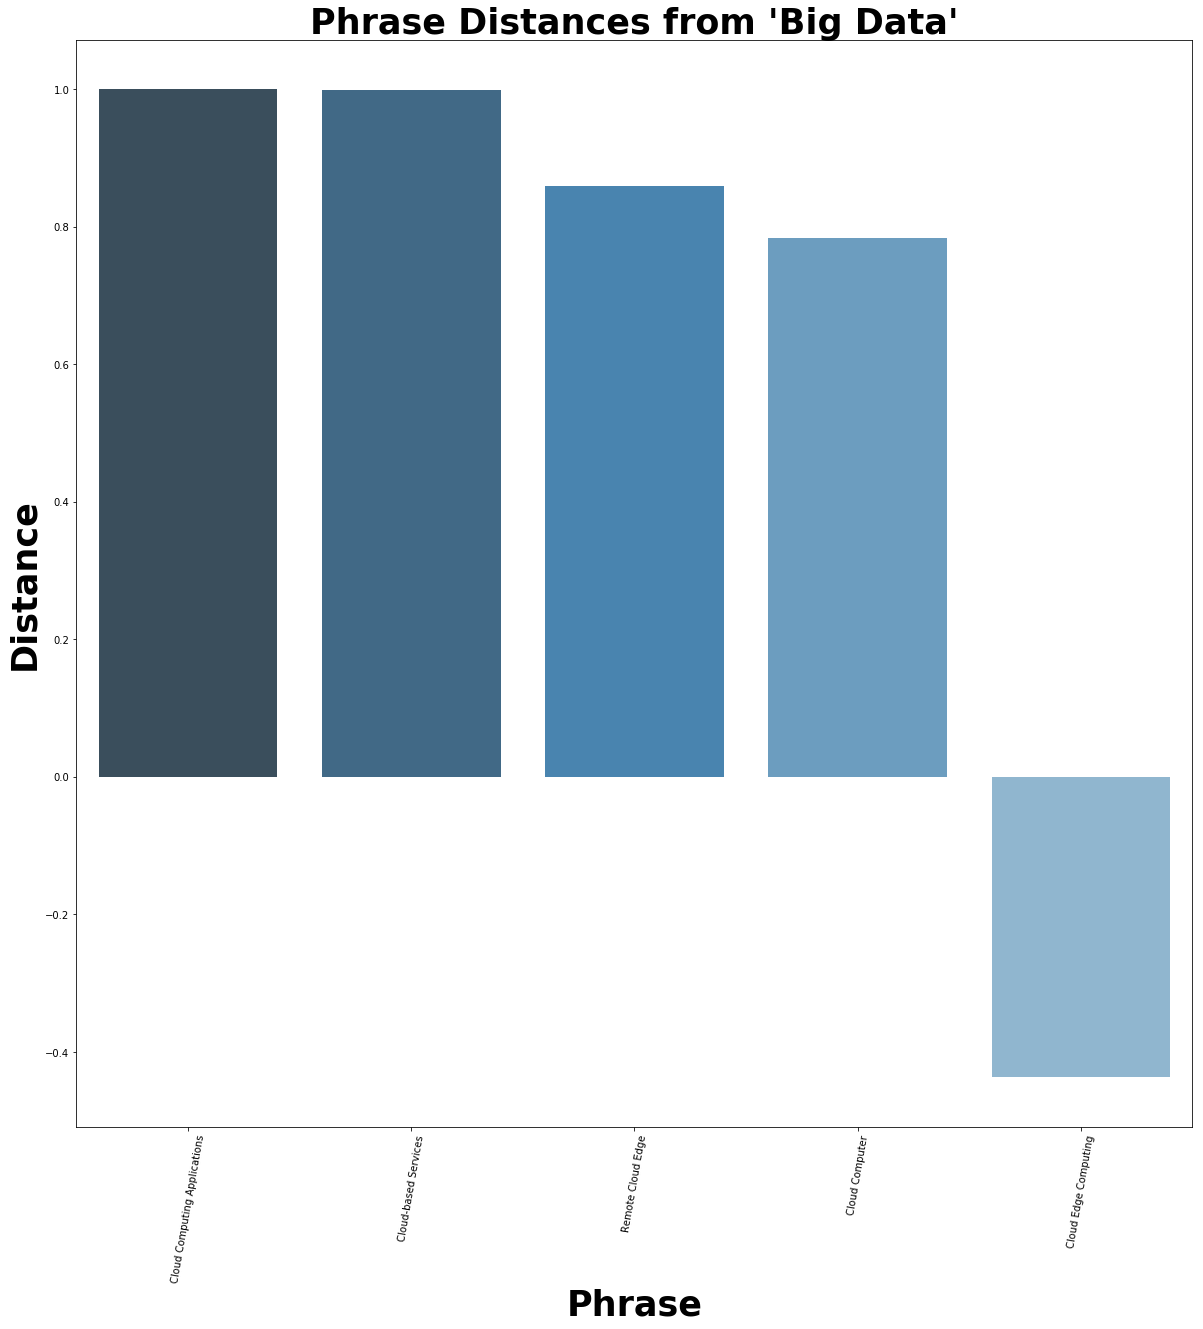

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
pal = sns.color_palette("Blues_d", len(data_lack_of_real_world_data3gram))
rank = data_lack_of_real_world_data3gram.argsort().argsort()
sdatabig3 = sns.barplot(x=data_lack_of_real_world_data3gram.index, y=data_lack_of_real_world_data3gram, palette=np.array(pal[::-1])[rank])
plt.xticks(rotation=80)
sdatabig3.set_title("Phrase Distances from 'Big Data'",weight='bold').set_fontsize(35)
sdatabig3.set_ylabel("Distance",weight="bold").set_fontsize(35)
sdatabig3.set_xlabel("Phrase",weight='bold').set_fontsize(35)
plt.rc("xtick",labelsize=40)
plt.rc("ytick",labelsize=40)
sdatabig3.figure.savefig("lackofdata3gram.png")

In [14]:
import PyPDF2

In [15]:
from sklearn.decomposition import PCA

In [16]:
import tika 
from tika import parser
from bs4 import BeautifulSoup
tika.initVM()
from graphviz import Digraph, nohtml

import psutil

from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import io
import time

In [17]:
from sklearn.manifold import TSNE

In [18]:
from gensim.similarities import WmdSimilarity

In [19]:
import nltk
from nltk.corpus import stopwords 

In [20]:
from nltk.util import ngrams

In [21]:
import re

In [22]:
s = set(stopwords.words())

In [23]:
import os
len(os.listdir("../literature/Taxonomy/Collected"))

157

In [24]:
categories = \
{"Lack of Real-World Network Data":{"Simulated Realism":["Intrusion Detection System Using Honeypots and Swarm Intelligence",
                                                 "Researches on the IPv6 Network Safeguard Linked System",
                                                 "An Intrusion Detection System Based on Honeypot Technology",
                                                 "Generating realistic intrusion detection system dataset based on fuzzy qualitative modeling",
                                                 "UNSW-NB15- A Comprehensive Data set for Network Intrusion Detection systems",
                                                         "Hypervisor-based cloud intrusion detection through online multivariate statistical change tracking",
                                                    "Real time dataset generation framework for intrusion detection systems in IoT",
                                                     "Detecting Return-to-libc Buffer Overflow Attacks Using Network Intrusion Detection Systems",
                                                     "A Credible Network Intrusion Detection System Based on Grid",
                                                     "Virtual Machine Monitor-Based Lightweight Intrusion Detection",
                                                     "NICE- Network Intrusion Detection and Countermeasure Selection in Virtual Network Systems",
                                                     "vNIDS- Towards Elastic Security with Safe and Efficient Virtualization of Network Intrusion Detection Systems"],
                                    "Collection in Real Network Infrastructure":
                                    ["LITNET-2020- An Annotated Real-World Network Flow Dataset for Network Intrusion Detection",
                                     "UGR'16- A New Dataset for the Evaluation of Cyclostationarity-Based Network IDSs",
                                     "Clustering of Snort Alerts to Identify Patterns and Reduce Analyst Workload"]},
"Noisy Data":{"Feature Normalization":['A New Method of Fuzzy Support Vector Machine Algorithm for Intrusion Detection',
                                       "Toward an Online Network Intrusion Detection System Based on Ensemble Learning",
                                       "PCA filtering and probabilistic SOM for network intrusion detection"],
             "Density-Based Feature Selection":["Semi-Supervised K-Means DDoS Detection Method Using Hybrid Feature Selection Algorithm",
                                                "A Novel Semi-Supervised Learning Approach for Network Intrusion Detection on Cloud-Based Robotic System",
                                                "A local density-based approach for outlier detection"]},
"Redundant Data": {"Redundancy Removal Frameworks":["Towards a Reliable Comparison and Evaluation of Network Intrusion Detection Systems Based on Machine Learning Approaches",
                                                   "Evaluating Deep Learning Based Network Intrusion Detection System in Adversarial Environment"],
                  "Feature Selection":["Selection of Effective Features for BGP Anomaly Detection",
                                       "A novel feature-selection approach based on the cuttlefish optimization algorithm for intrusion detection systems",
                                       "The Detection of Network Intrusion Based on Improved Adaboost Algorithm",
                                       "Dimensionality reduction with IG-PCA and ensemble classifier for network intrusion detection",
                                       "A GA-LR wrapper approach for feature selection in network intrusion detection",
                                       "Dimensionality reduction using Principal Component Analysis for network intrusion detection",
                                       "Effects-based feature identification for network intrusion detection",
                                       "The significant features of the UNSW-NB15 and the KDD99 data sets for Network Intrusion Detection Systems",
                                       "A novel architecture combined with optimal parameters for back propagation neural networks applied to anomaly network intrusion detection",
                                       "A novel intrusion detection system based on hierarchical clustering and support vector machines",
                                       "Network intrusion detection system based on recursive feature addition and bigram technique",
                                       "Wireless Network Intrusion Detection Based on Improved Convolutional Neural Network",
                                       "Evolving deep learning architectures for network intrusion detection using a double PSO metaheuristic",
                                       "Network Intrusion Detection Based on PSO-Xgboost Model"],
                  "Data Discretization":["A Discretized Extended Feature Space (DEFS) Model to Improve the Anomaly Detection Performance in Network Intrusion Detection Systems",
                                         "A network intrusion detection system based on a Hidden Naive Bayes multiclass classifier",
                                         "Feature Selection Based on Rough Set and Modified Genetic Algorithm for Intrusion Detection",
                                         "A Naive Feature Selection Method and Its Application in Network Intrusion Detection",
                                         "Machine-Learning-Based Feature Selection Techniques for Large-Scale Network Intrusion Detection",
                                         "Intrusion Detection using Naive Bayes Classifier with Feature Reduction",
                                         "Cyber intrusion detection by combined feature selection algorithm"],
                  "Rough Set":["An efficient feature selection based Bayesian and Rough set approach for intrusion detection",
                              "Adaptive intrusion detection via GA-GOGMM-based pattern learning with fuzzy rough set-based attribute selection",
                               "Intelligent temporal classification and fuzzy rough set-based feature selection algorithm for intrusion detection system in WSNs",
                               "Development of Rough Set- Hypergraph Technique for Key Feature Identification in Intrusion Detection Systems",
                               "A hybrid network intrusion detection system using simplified swarm optimization (SSO)"],
                  "Autoencoder":["HELAD- A novel network anomaly detection model based on heterogeneous ensemble learning",
                                 "Deep Learning Approach Combining Sparse Autoencoder With SVM for Network Intrusion Detection"],
                  "Attention Mechanism":["BAT- Deep Learning Methods on Network Intrusion Detection Using NSL-KDD Dataset"],
                  "Hypergraph Helly and Trim Properties To Identify Informative Features":["Detection of Cyberattacks in Industrial Control systems using Enhanced Principal Component Analysis and Hypergraph based Convolution Neural Network (EPCA-HG-CNN)"]
                  },
"Weakly Correlated Data":{"Increase Dimensionality":["Robust detection for network intrusion of industrial IoT based on multi-CNN fusion"]},
"Too Few Labeled Data":{"Semi-supervised learning":["Semi-Supervised Learning based Security to Detect and Mitigate Intrusions in IoT Network",
                                                    "Intrusion Detection Algorithm Based On Semi-supervised Learning",
                                                    "Nonparametric Semi-Supervised Learning for Network Intrusion Detection- Combining Performance Improvements with Realistic In-Situ Training",
                                                    "Research on Intrusion Detection method based on SVM Co-training",
                                                    "Unsupervised Network Intrusion Detection Systems- Detecting the Unknown without Knowledge",
                                                    "A Novel Two-Stage Deep Learning Model for Efficient Network Intrusion Detection",
                                                    "Improved competitive learning neural networks for network intrusion and fraud detection"],
                       "Transfer Learning":["Network Anomaly Detection inside Consumer Networks- A Hybrid Approach",
                                            "Overcoming the Lack of Labeled Data- Training Intrusion Detection Models using Transfer Learning"],
                       "Adversarial Sample Generation":["Investigating Adversarial Attacks against Network Intrusion Detection Systems in SDNs",
                                                       "Defending network intrusion detection systems against adversarial evasion attacks",
                                                        "Flow-based network traffic generation using Generative Adversarial Networks",
                                                        "Generative Adversarial Networks For Launching and Thwarting Adversarial Attacks on Network Intrusion Detection Systems",
                                                        "Evading botnet detectors based on flows and Random Forest with adversarial samples",
                                                        "PAC-GAN- Packet Generation of Network Traffic using Generative Adversarial Networks",
                                                        "Addressing Adversarial Attacks Against Security Systems Based on Machine Learning"]},
"Imbalanced Data":{"Over Sampling, Under Sampling":["An effective convolutional neural network based on SMOTE and Gaussian mixture model for intrusion detection in imbalanced dataset",
                                                   "Data Processing and Model Selection for Machine Learning-based Network Intrusion Detection",
                                                   "1D CNN based network intrusion detection with normalization on imbalanced data",
                                                   "Hierarchical intrusion detection using machine learning and knowledge model",
                                                   "Network Intrusion Detection Based on Supervised Adversarial Variational Auto-Encoder With Regularization",
                                                   "A Semi-Boosted Nested Model With Sensitivity-Based Weighted Binarization for Multi-Domain Network Intrusion Detection",
                                                   "An Adaptive Ensemble Machine Learning Model for Intrusion Detection",
                                                   "Network Intrusion Detection Combined Hybrid Sampling With Deep Hierarchical Network"],
                  "Optimal Feature Extraction":["Anomaly-Based Network Intrusion Detection Using SVM",
                                                "An integrated Intrusion Detection Model using consistency based feature selection and LPBoost",
                                                "An improved NSGA-III algorithm for feature selection used in intrusion detection"],
                  "Feature Fusion": ["PCCN- Parallel Cross Convolutional Neural Network for Abnormal Network Traffic Flows Detection in Multi-Class Imbalanced Network Traffic Flows"],
                  "Transfer Learning":["CNN-Based Network Intrusion Detection against Denial-of-Service Attacks"],
                  "Siamese Neural Network":["Siam-IDS- Handling class imbalance problem in Intrusion Detection Systems using Siamese Neural Network"],
                  "Genetic Programming":["Malware Detection Using Genetic Programming",
                                        "Genetic Fuzzy System For Intrusion Detection - Analysis of Improving of multiclass classification accuracy using KDDCup-99 imbalance dataset",
                                        "On the combination of genetic fuzzy systems and pairwise learning for improving detection rates on Intrusion Detection Systems",
                                         "Network Intrusion Detection System using Genetic Network Programming with Support Vector Machine"]
                  },
"Big Data":{"Data Reduction":["Network Intrusion Detection using Hybrid Machine Learning",
                                                 "An Authorized Access Attack Detection Method for Realtime Intrusion Detection System",
                                                "A Deep Learning Approach to Network Intrusion Detection",
                                                "Large High Dimensional Data Handing Using Data Reduction",
                                "Anomalous query access detection in RBAC-administered databases with random forest and PCA",
                                "R1SVM- A Randomised Nonlinear Approach to Large-Scale Anomaly Detection",
                                "Improved Salp Swarm Algorithm based on opposition based learning and novel local search algorithm for feature selection",
                                "An Effective Feature Selection Approach for Network Intrusion Detection",
                                "An Efficient Flow Control Approach for SDN-based Network Threat Detection and Migration Using Support Vector Machine",
                                "An efficient network intrusion detection",
                                "Inductive Intrusion Detection in Flow-Based Network Data using One-Class Support Vector Machines",
                                "An Intrusion Detection System Using a Deep Neural Network With Gated Recurrent Units",
                                "Network Intrusion Detection Based on LDA for Payload Feature Selection",
                                "Sampling Techniques to Accelerate Pattern Matching in Network Intrusion Detection Systems"],
            "Optimized Initial Parameters": ["A Cooperative and Hybrid Network Intrusion Detection Framework in Cloud Computing Based on Snort and Optimized Back Propagation Neural Network"],
            "Edge Computing": ["RoPE- An Architecture for Adaptive Data-Driven Routing Prediction at the Edge",
                               "Data-driven Edge Intelligence for Robust Network Anomaly Detection"],
            "Matched Filter":["Fast Binary Network Intrusion Detection based on Matched Filter Optimization"],
            "Incremental Learning":["DAD-MCNN- DDoS Attack Detection via Multi-channel CNN",
                                    "Incremental SVM based on reserved set for network intrusion detection",
                                    "Research of Intrusion Detection Method Based on IL-FSVM",
                                    "DeepDDoS- Online DDoS Attack Detection",
                                    "Network intrusion detection using equality constraine d-optimization-base d extreme learning machines"],
            "Parallelism and Multithreading":["A Novel Hierarchical Parallelism for Accelerating NIDS Using GPUs",
                                              "Design Consideration of Network Intrusion Detection System using Hadoop and GPGPU",
                                               "A New Architecture for Network Intrusion Detection and Prevention",
                                              "Improving network intrusion detection system performance through quality of service configuration and parallel technology",
                                              "MIDeA- A Multi-Parallel Intrusion Detection Architecture"],
            "Cloud Computing":["Towards Near-Real-Time Intrusion Detection for IoT Devices using Supervised Learning and Apache Spark",
                               "Development of a Network Intrusion Detection System Using Apache Hadoop and Spark",
                               "Intrusion Detection Using Big Data and Deep Learning Techniques",
                               "A Framework for Fast and Efficient Cyber Security Network Intrusion Detection using Apache Spark",
                               "Real-time Support Vector Machine Based Network Intrusion Detection System Using Apache Storm",
                               "Performance evaluation of intrusion detection based on machine learning using Apache Spark"]},
"Dynamic Data":{"Stream Data Models":["Ensemble-Based Online Machine Learning Algorithms for Network Intrusion Detection Systems Using Streaming Data",
                                      "Learning concept-drifting data streams with random ensemble decision trees",
                                      "Real-time feature selection technique with concept drift detection using adaptive micro-clusters for data stream mining",
                                      "GPU-accelerated Outlier Detection for Continuous Data Streams",
                                      "Unsupervised Outlier Detection in Streaming Data Using Weighted Clustering",
                                      "An incremental intrusion detection system using a new semisupervised stream classification method"],
                "Reinforcement Learning":["Deep Reinforcement Learning based Intrusion Detection System for Cloud Infrastructure",
                                          "A New Approach for Adaptive Intrusion Detection"],
                 "Incremental Learning": ["ANID-SEoKELM-Adaptive network intrusion detection based on selective ensemble of kernel ELMs with random features",
                                          "Network-Traffic Anomaly Detection with Incremental Majority Learning",
                                          "Incremental Anomaly Detection in Graphs",
                                          "Detecting Bots via Incremental LS-SVM Learning with Dynamic Feature Adaptation",
                                          "Incremental k-NN SVM Method in Intrusion Detection",
                                          "A Novel Online Incremental Learning Intrusion Prevention System",
                                          "Mining network data for intrusion detection through combining SVMs with ant colony networks",
                                          "Adaptive Network Intrusion Detection System using a Hybrid Approach",
                                          "A population-based incremental learning approach with artificial immune system for network intrusion detection"]},
"Small Data":{"Meta-Learning":["A Method of Few-Shot Network Intrusion Detection Based on Meta-Learning Framework",
                               "A Hybrid Intelligent Approach for Network Intrusion Detection",
                               "Research on Intrusion Detection Model Using Ensemble learning Methods",
                               "Improved Network Traffic Classification Using Ensemble Learning",
                               "An advanced method for detection of botnet traffic using Intrusion Detection System",
                               "Intrusion Detection Using Error Correcting Output Code Based Ensemble",
                               "Data Randomization and Cluster-Based Partitioning for Botnet Intrusion Detection"],
             "Transfer Learning":["Mimic Learning to Generate a Shareable Network Intrusion Detection Model",
                                 "CANTransfer- Transfer Learning based Intrusion Detection on a Controller Area Network using Convolutional LSTM Network",
                                  "Feature-Based Transfer Learning for Network Security",
                                  "Transfer learning for detecting unknown network attacks",
                                  "Leveraging Image Representation of Network Traffic Data and Transfer Learning in Botnet Detection"],
             "Hierarchical Network": ["Network Intrusion Detection- Based on Deep Hierarchical Network and Original Flow Data"],
              "Sub-sampling": ["Newest Collaborative and Hybrid Network Intrusion Detection Framework Based on Suricata and Isolation Forest Algorithm"],
              "Data Fusion":["A Novel Multimodal-Sequential Approach Based on Multi-View Features for Network Intrusion Detection",
                             "Deep and Machine Learning Approaches for Anomaly-Based Intrusion Detection of Imbalanced Network Traffic",
                             "Network Intrusion Detection and its Strategic Importance",
                             "Research on the Intrusion Detection Technology with Hybrid Model",
                              "Fusion of ANN and SVM Classifiers for Network Attack Detection",
                             "Data Fusion Detection Model Based on SVM and Evidence Theory"]
             }
}


In [25]:
def count(d,c):
    for key in d.keys():
        if type(d[key]) == list:
            c[0] += len(d[key])
        elif type(d[key]) == dict:
            count(d[key],c)
c = [0]
count(categories,c)

In [26]:
def getdwrapper(d,L):
    if (d == {}):
        return L
    else:
        for i,key in enumerate(d):
            if (type(d[key]) == dict):
                if (i < len(d.keys())):
                    getdwrapper(d[key],L)
                elif (type(d[key]) == list):
                    return L
            else:
                L += d[key]
        return L

def getd(d):
    return getdwrapper(d,[])

p = dict()
for x in getd(categories):
    if (p.get(x) != None):
        p[x] += 1
    else:
        p[x] = 1
#list(filter(lambda k: p[k] > 1, p))



In [27]:
set_articles_dict_topic = dict()
for key in categories:
    L = []
    for subkey in categories[key]:
        L += categories[key][subkey]
    set_articles_dict_topic[key] = set(L)

In [28]:
articles_dict_topic = dict()
for key in categories:
    for subkey in categories[key]:
        for paper in categories[key][subkey]:
            articles_dict_topic[paper] = key

In [29]:
# def get_strs_wrapper(L_,strs):
#     if (L_ == []):
#         return strs
#     else:
#         if (type(L_[0]) == list):
#             return get_strs_wrapper(L_[0],strs)+get_strs_wrapper(L_[1:],strs) 
#         else:
#             return get_strs_wrapper(L_[1:],strs+L_[0].split())
# def get_strs(L_):
#     return get_strs_wrapper(L_,[])

#get_strs([["ls -al",["df -h","cd ~","exit"]],[["whoami","exit"]],[[["cd ~/Desktop","ls"],"ls -al"],["exit"]],["df -h","diskutil unmount /dev1/something"]])
#articles_dict_topic



In [30]:
parsedPDF = tika.parser.from_file(
        "../literature/Taxonomy/Collected/{}.pdf".format("PCA filtering and probabilistic SOM for network intrusion detection"),xmlContent=True)    
parsedPDF['metadata'].get('Creation-Date')
    
    

'2015-05-13T05:22:32Z'

In [31]:
import graphviz
import pygraphviz
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph


In [32]:
import enchant
english_dictionary = enchant.Dict("en_US")

In [33]:
unknown_publishers = {'Defending network intrusion detection systems against adversarial evasion attacks':'Elsevier',
    'Deep Learning Approach Combining Sparse Autoencoder With SVM for Network Intrusion Detection':'IEEE',
    'A Discretized Extended Feature Space (DEFS) Model to Improve the Anomaly Detection Performance in Network Intrusion Detection Systems': "SCITEPRESS",
"Network Intrusion Detection Based on Supervised Adversarial Variational Auto-Encoder With Regularization":"IEEE",
"Towards Near-Real-Time Intrusion Detection for IoT Devices using Supervised Learning and Apache Spark":"MDPI",
"An efficient network intrusion detection":"Elsevier",
"Ensemble-Based Online Machine Learning Algorithms for Network Intrusion Detection Systems Using Streaming Data":"MDPI",
"Intrusion Detection System Using Honeypots and Swarm Intelligence":"ACM",
"Research of Intrusion Detection Method Based on IL-FSVM":"IEEE",
"Evaluating Deep Learning Based Network Intrusion Detection System in Adversarial Environment":"IEEE",
"An effective convolutional neural network based on SMOTE and Gaussian mixture model for intrusion detection in imbalanced dataset":"Elsevier",
"Detecting Bots via Incremental LS-SVM Learning with Dynamic Feature Adaptation":"ACM",
"Network Anomaly Detection inside Consumer Networks-A Hybrid Approach":"MDPI",
"An efficient feature selection based Bayesian and Rough set approach for intrusion detection":"Elsevier",
"Leveraging Image Representation of Network Traffic Data and Transfer Learning in Botnet Detection":"MDPI",
"DAD-MCNN- DDoS Attack Detection via Multi-channel CNN":"ACM",
"Real time dataset generation framework for intrusion detection systems in IoT":"Elsevier",
"PCCN- Parallel Cross Convolutional Neural Network for Abnormal Network Traffic Flows Detection in Multi-Class Imbalanced Network Traffic Flows":"IEEE",
"A New Architecture for Network Intrusion Detection and Prevention":"IEEE",
"A Novel Two-Stage Deep Learning Model for Efficient Network Intrusion Detection":"IEEE",
"vNIDS- Towards Elastic Security with Safe and Efficient Virtualization of Network Intrusion Detection Systems":"ACM",
"A Novel Semi-Supervised Learning Approach for Network Intrusion Detection on Cloud-Based Robotic System":"IEEE",
"An Adaptive Ensemble Machine Learning Model for Intrusion Detection":"IEEE",
"The Detection of Network Intrusion Based on Improved Adaboost Algorithm":"ACM",
"A modified neuro-fuzzy classifier and its parallel implementation on modern GPUs for real time intrusion detection":"Elsevier",
"An Intrusion Detection System Using a Deep Neural Network With Gated Recurrent Units":"IEEE",
"Improving outliers detection in data streams using LiCS and voting":"Elsevier",
"Semi-Supervised K-Means DDoS Detection Method Using Hybrid Feature Selection Algorithm":"IEEE",
"Intrusion Detection Using Big Data and Deep Learning Techniques":"ACM",
"Wireless Network Intrusion Detection Based on Improved Convolutional Neural Network":"IEEE",
"CNN-Based Network Intrusion Detection against Denial-of-Service Attacks":"MDPI",
"UGR'16- A New Dataset for the Evaluation of Cyclostationarity-Based Network IDSs":"Elsevier",
"A Framework for Fast and Efficient Cyber Security Network Intrusion Detection using Apache Spark":"Elsevier",
"Feature-Based Transfer Learning for Network Security":"IEEE",
"A Semi-Boosted Nested Model With Sensitivity-Based Weighted Binarization for Multi-Domain Network Intrusion Detection":"ACM",
"Network Intrusion Detection Based on PSO-Xgboost Model":"IEEE",
"Newest Collaborative and Hybrid Network Intrusion Detection Framework Based on Suricata and Isolation Forest Algorithm":"ACM",
"R1SVM- A Randomised Nonlinear Approach to Large-Scale Anomaly Detection":"AAAI",
"A Hybrid Intelligent Approach for Network Intrusion Detection":"Elsevier",
"Generating realistic intrusion detection system dataset based on fuzzy qualitative modeling":"Elsevier",
"Transfer learning for detecting unknown network attacks":"Springer",
"CANTransfer – Transfer Learning based Intrusion Detection on a Controller Area Network using Convolutional LSTM Network":"ACM",
"Hierarchical intrusion detection using machine learning and knowledge model":"MDPI",
"A novel feature-selection approach based on the cuttlefish optimization algorithm for intrusion detection systems":"Elsevier",
"Incremental k-NN SVM Method in Intrusion Detection":"IEEE",
"An advanced method for detection of botnet traffic using Intrusion Detection System":"IEEE",
"LITNET-2020- An Annotated Real-World Network Flow Dataset for Network Intrusion Detection":"MDPI",
"ANID-SEoKELM-Adaptive network intrusion detection based on selective ensemble of kernel ELMs with random features":"Elsevier",
"BAT- Deep Learning Methods on Network Intrusion Detection Using NSL-KDD Dataset":"IEEE",
"Network Intrusion Detection System using Genetic Network Programming with Support Vector Machine":"ACM",
"MIDeA- A Multi-Parallel Intrusion Detection Architecture":"ACM",
"Addressing Adversarial Attacks Against Security Systems Based on Machine Learning":"IEEE",
"Network Intrusion Detection- Based on Deep Hierarchical Network and Original Flow Data":"IEEE",
"Real-time feature selection technique with concept drift detection usingadaptive micro-clusters for data stream mining":"Elsevier",
"Network Intrusion Detection Combined Hybrid Sampling With Deep Hierarchical Network":"IEEE",
"Development of a Network Intrusion Detection System Using Apache Hadoop and Spark":"IEEE",
"Nonparametric Semi-Supervised Learning for Network Intrusion Detection- Combining Performance Improvements with Realistic In-Situ Training":"ACM",
"Virtual Machine Monitor-Based Lightweight Intrusion Detection":"ACM",
"Overcoming the Lack of Labeled Data- Training Intrusion Detection Models using Transfer Learning":"IEEE",
"A Novel Multimodal-Sequential Approach Based on Multi-View Features for Network Intrusion Detection":"IEEE",
"A New Method of Fuzzy Support Vector Machine Algorithm for Intrusion Detection":"MDPI",
"Towards a Reliable Comparison and Evaluation of Network Intrusion Detection Systems Based on Machine Learning Approaches":"MDPI",
"Fusion of ANN and SVM Classifiers for Network Attack Detection":"IEEE",
"Robust detection for network intrusion of industrial IoT based on multi-CNN fusion":"Elsevier",
"Improved Network Traffic Classification Using Ensemble Learning":"IEEE",
"Network Anomaly Detection inside Consumer Networks- A Hybrid Approach":"MDPI",
"An incremental intrusion detection system using a new semisupervised stream classification method":"Wiley"}

unknown_pubkeys = set(unknown_publishers.keys())


In [34]:
publishers = []
for file in os.listdir("../literature/Taxonomy/Collected"):
    if file != ".DS_Store":
        inputfile = "../literature/Taxonomy/Collected/{}".format(file)
        reader_pdf = PyPDF2.PdfFileReader(inputfile,strict=False)
        pdf_xmp = reader_pdf.getXmpMetadata()
        xmp_names = ["custom_properties","dc_contributor","dc_coverage","dc_creator","dc_date",
                     "dc_description","dc_format","dc_identifier","dc_language","dc_publisher"]
        parsedPDF = tika.parser.from_file(inputfile, xmlContent = True)
        xmp_dict = {}
        for name in xmp_names:
            try:
                xmp_dict[name] = getattr(pdf_xmp, name)
            except:
                xmp_dict[name] = "Unknown"
        if (file[:-4] in unknown_pubkeys):
            publishers += [tuple([file[:-4],unknown_publishers[file[:-4]]])]
        else:
            if (len(xmp_dict["dc_publisher"]) == 0):
                print(file)
            publishers += [tuple([file[:-4],xmp_dict["dc_publisher"][0].split()[0] if (len(xmp_dict["dc_publisher"]) != 0) else ""])]
        




CANTransfer- Transfer Learning based Intrusion Detection on a Controller Area Network using Convolutional LSTM Network.pdf


In [35]:


class ArticleHandler(object):
    def __init__(self,directory:str, data:pd.core.frame.DataFrame = pd.DataFrame({"article_title":[],"text":[], "creation_date":[], "article_length":[], "publisher":[],"topic":[]})):
        self.dir = directory
        # pre-existing data or from scratch
        self.data = data
        self.articles_ordered = []
    # REQ: path_to_pdf being a valid path not starting with /
    # ENS: s ==> string containing text extracted from the specified pdf.
    def parse_pdf(self,path_to_pdf:str,article_class=None)->str:
        def get_val(s):
            i1 = s.lower().find("introduction")
            val = None
            if (i1 != -1):
                val = s[:i1]
            else:
                i2 = s.lower().find("summary")
                if (i2 != -1):
                    val = s[:i2]
                else:
                    i3 = s.lower().find("current study")
                    if (i3 != -1):
                        val = s[:i3]
                    else:
                        i4 = s.lower().find("background")
                        val = s[:i4]
            return val
        inputfile = self.dir+"/"+path_to_pdf
        parsedPDF = tika.parser.from_file(inputfile, xmlContent = True)
        L = list(filter(lambda x: (len(x) > 30),list(map(lambda x: x.text, BeautifulSoup(parsedPDF['content'],"html.parser").find_all('p')))))
        text = " ".join(" ".join(L).split("\n"))
        text = text.replace("- ", "")
        text = text.replace(" - ", "-")
        text = text.replace(" -", " ")
        s = parsedPDF['metadata'].get('resourceName')
        if (type(s) == list): 
            s = s[0]
            if (s.startswith("b'")):
                s = s[2:len(s)-1]
            else:
                s = s[1:]
        else: 
            if (s.startswith("b'")):
                s = s[2:len(s)-1]
            else:
                s = s[1:] # then s should be a string

        if (s.endswith(".pdf")):
            s = s[:-4]

        t = get_val(text)
        if (parsedPDF['metadata'].get('Creation-Date') == None):
            print(path_to_pdf)
        top_ = None
        for topic in set_articles_dict_topic:
            if s in set_articles_dict_topic[topic]:
                top_ = topic
                break
        new_row = {"article_title": s,
                   "text": t.lower(),
                   "creation_date": parsedPDF['metadata'].get('Creation-Date'),
                   "article_length": parsedPDF['metadata'].get('xmpTPg:NPages'),
                   "publisher": publishers,
                   "topic":top_}
        if (article_class != None and article_class == articles_dict_topic[s]):
            self.data = self.data.append(new_row, ignore_index=True)
        elif (article_class == None):
            self.data = self.data.append(new_row, ignore_index=True)
    # REQ: True
    # ENS: (result,n) ==> tuple of string specifying the string result from the directory that 
    # was parsed and an integer indicating the number of articles 
    def parse_dir(self,category):
        result = []
        i = 0
        def parse_dir_recur(curr_dir):
            for item in os.listdir(curr_dir):
                if os.path.isdir(curr_dir+"/"+item):
                    parse_dir_recur(curr_dir+"/"+item)
                elif (os.path.isfile(curr_dir+"/"+item) and item != ".DS_Store"):
                    self.parse_pdf(item, category)
        parse_dir_recur(self.dir)
        self.data = self.data.dropna()
    def get_data(self):
        return self.data
    def to_csv(self,name):
        self.data.to_csv("{}.csv".format(name))
    def order_by(self, by="creation_date",category=None):
        L = []
        for i in range(len(self.data)-1,-1,-1):
            if (self.data.iloc[i][by] == "" or self.data.iloc[i][by] == None):
                self.data.drop([i])
            else:
                L += [list(self.data.iloc[i][["article_title",by]])]
        if (category==None):
            self.articles_ordered = sorted(list(L),key=lambda x: x[1])
        else:
            s = set(getd(categories[category]))
            self.articles_ordered = sorted(list(filter(lambda x: x[0] in s, L)),key=lambda x: x[1])
        return sorted(list(L),key=lambda x: x[1])
    def get_time_graph(self,n):
        G = nx.Graph()
        col = "red"
        end = False
        for i,_ in enumerate(list(range(n))+list(range(len(self.articles_ordered)-1-n,len(self.articles_ordered)-1))): 
            if i >= n and (not end):
                end = True
                col = "blue"
            name1, name2 = self.articles_ordered[i][0], self.articles_ordered[i+1][0]
            G.add_node(name1,color=col)
            G.add_node(name2,color=col)
            G.add_edge(name1,name2,color="black")
        A = to_agraph(G)
        A.layout()
        A.draw('./graphs/time_graph.png')
        self.graph = A
    def make_model_articles(self,n):
        def majority_in_dict_not_in_s(x,n):
            words = x.split()
            in_dict = 0
            not_in_s = 0
            for word in words:
                if english_dictionary.check(word):
                    in_dict += 1
                if word not in s:
                    not_in_s += 1
            return (in_dict >= 0.5*n) and (not_in_s == n)
        def alpha(x):
            words = x.split()
            for word in words:
                if not word.isalpha():
                    return False
            return True
        # CBOW and Skip Gram Model for 
        # Word Vector Embeddings
        # first gensim
        L = articles.data["text"].apply(lambda x: re.sub("\b\d+\b"," ",str(x)))
        L = list(articles.data["text"].apply(lambda x: list(map(lambda tup: " ".join(list(tup)) ,
            list(ngrams(nltk.word_tokenize(re.sub(r'[^\w\s]',"",str(x))), n)))) ))
        L = list(map(lambda subLst: list(filter(lambda x: (alpha(x)) and majority_in_dict_not_in_s(x,n), subLst)),L))
        self.model = Word2Vec(L, size=2, window=4, sg=1, min_count=1)
    def csv_to_data(self,csv_name):
        self.data = pd.read_csv(csv_name)
        return self.data
    def tfidf_vectorize(self):
#         def max_count(sentence:list):
#             d = dict()
#             for word_ in sentence:
#                 if (d.get(word_) != None):
#                     d[word_] += 1
#                 else:
#                     d[word_] = 1
#             return (max(d.values()),counts)
#         mx_count,counts = max_count(sentence)
#         for word in sentence:
#             tf = 0.5+0.5*(counts[word]/mx_count_in_specific_document) # double normalization 
#             idf = np.log(total_num_documents/num_documents_with_word)
#.            - tf(term,document_i)*idf(term,all_documents)
        corpus = list(self.data["text"])
        vectorizer = TfidfVectorizer()
        data = vectorizer.fit_transform(corpus)
    def get_similarity(self,phrase1,phrase2):
        vectors = [self.model.wv[word] for word in self.model.wv.vocab.keys()]
        df = pd.DataFrame(vectors, columns=['x', 'y'], index=self.model.wv.vocab.keys())
        sns.relplot(x="x", 
                    y="y",
                    palette="Greens_r", 
                    data=df)
articles = ArticleHandler("../literature/Taxonomy/Collected")
for cat in categories.keys():
    articles.parse_dir(cat)
#articles.order_by(category="Big Data")
#articles.get_time_graph(5)
articles.to_csv("taxonomy_articles")


In [36]:
c = pd.read_csv("taxonomy_articles.csv")

In [37]:
a = articles.make_model_articles(3)

In [38]:
articles.model.build_vocab([["weakly correlated data"],
                      ["noisy data"], 
                      ["lack of real-world data"],
                      ["redundant data"],
                      ["too few labeled data"],
                      ["imbalanced data"],
                      ["big data"],
                      ["dynamic data"],
                      ["small data"]], update=True)

In [39]:
lst = articles.model.similar_by_vector(articles.model["noisy data"],topn=10000)
lst

[('using backpropagation neural', 1.0000001192092896),
 ('machine national sun', 1.0),
 ('noisy data', 1.0),
 ('preset minimum update', 1.0),
 ('prove effective since', 1.0),
 ('significantly outperforms existing', 0.9999999403953552),
 ('detection mechanism defences', 0.9999999403953552),
 ('extract repeatable features', 0.9999999403953552),
 ('classifier model stands', 0.9999998807907104),
 ('contains unidirectional netflow', 0.9999998807907104),
 ('data flow hijack', 0.9999998807907104),
 ('electronic engineering ruhr', 0.9999997615814209),
 ('existing research section', 0.9999997615814209),
 ('semisupervised incremental ids', 0.9999997019767761),
 ('network security analysis', 0.9999996423721313),
 ('network attacks outperforming', 0.9999996423721313),
 ('conventional neural network', 0.9999996423721313),
 ('anomaly detection requires', 0.9999995827674866),
 ('decay factor φ', 0.9999995231628418),
 ('ten orflow machine', 0.999999463558197),
 ('protection tech nology', 0.99999946355

In [40]:
# with open("../noisy_data-trigram1192021-3.txt","x") as f:
#     f.write(str(lst))

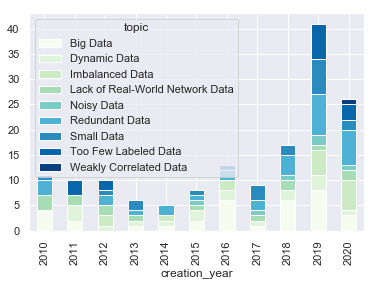

In [41]:
sns.set()
articles.data["creation_year"] = articles.data["creation_date"].apply(lambda x:  str(x)[:4])
article_data_df = articles.data.groupby(['creation_year', 'topic']).size().reset_index().pivot(columns='topic', index='creation_year', values=0)

article_data_df.plot(kind="bar",stacked=True,colormap="GnBu")


In [42]:
import calendar
from datetime import datetime

In [43]:
counts = {}
for key in categories:
    l = 0
    for lst in categories[key].values():
        l += len(lst)
    counts[key] = l
print(counts)
df_counts = pd.DataFrame({"taxonomy_category":list(counts.keys()),"number_of_articles":list(counts.values())})

{'Lack of Real-World Network Data': 15, 'Noisy Data': 6, 'Redundant Data': 32, 'Weakly Correlated Data': 1, 'Too Few Labeled Data': 16, 'Imbalanced Data': 18, 'Big Data': 34, 'Dynamic Data': 17, 'Small Data': 20}


In [44]:
df_counts

,taxonomy_category,number_of_articles
0,Lack of Real-World Network Data,15
1,Noisy Data,6
2,Redundant Data,32
3,Weakly Correlated Data,1
4,Too Few Labeled Data,16
5,Imbalanced Data,18
6,Big Data,34
7,Dynamic Data,17
8,Small Data,20


Text(0.5, 1.0, 'Number of articles per taxonomy category')

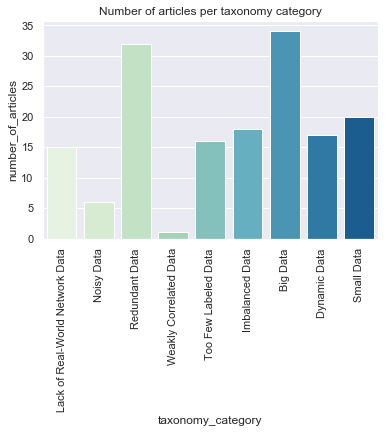

In [45]:
sns.barplot(x="taxonomy_category",y="number_of_articles",data=df_counts,palette="GnBu")
plt.xticks(rotation=90)
plt.title("Number of articles per taxonomy category")

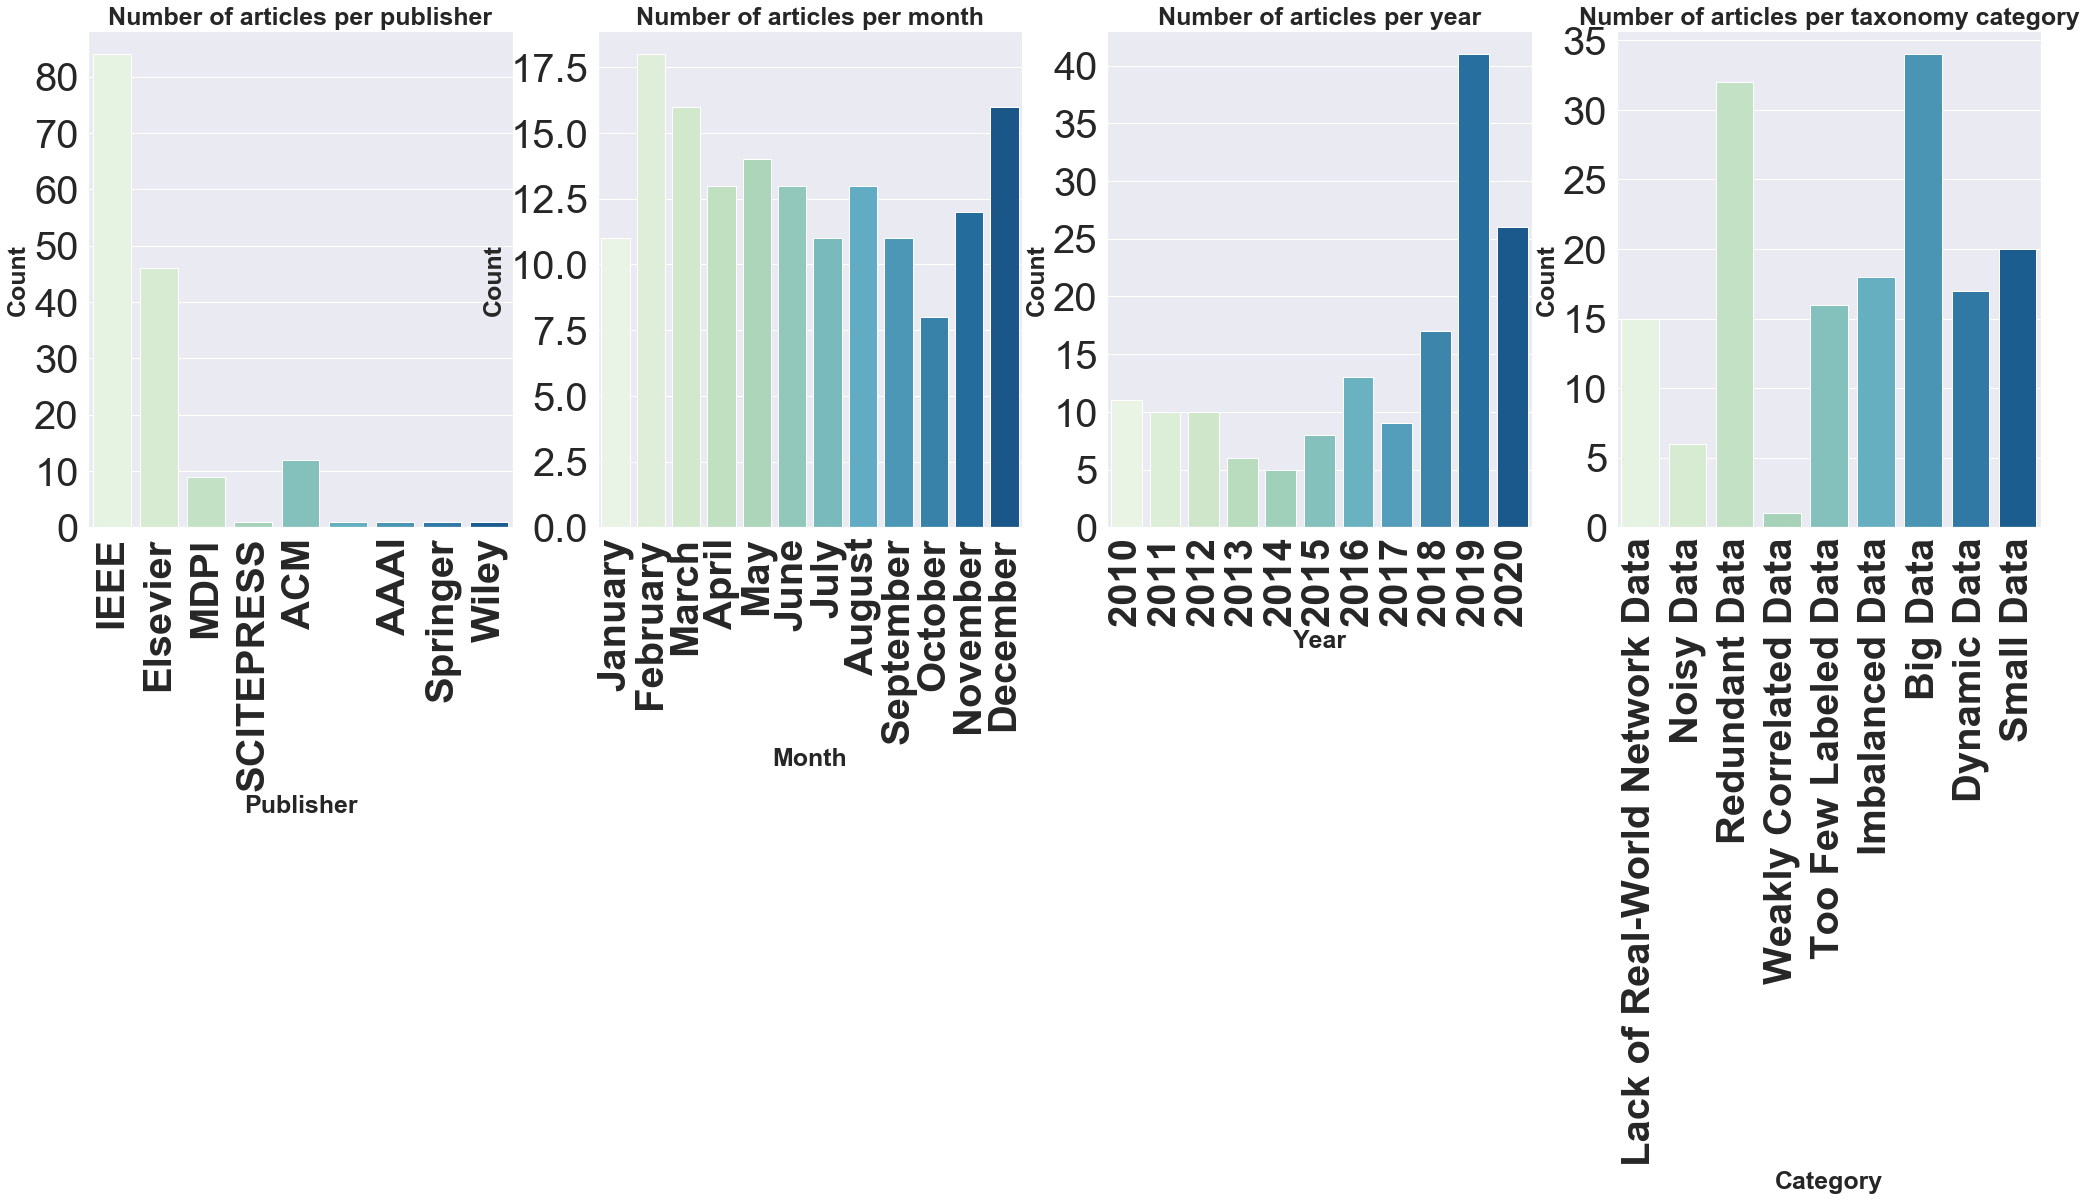

In [46]:
sns.set(rc={'figure.figsize':(35,30)})
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.2)
plt.rc("xtick",labelsize=40)
plt.rc("ytick",labelsize=40)
fig, axs = plt.subplots(1,4)
publishers_seaborn = sns.countplot(list(map(lambda L: L[1], publishers)),palette="GnBu",ax=axs[0])
publishers_seaborn.set_xticklabels(publishers_seaborn.get_xticklabels(),rotation=90,weight='bold')
publishers_seaborn.set_title("Number of articles per publisher",weight='bold').set_fontsize(25)
publishers_seaborn.set_ylabel("Count",weight="bold").set_fontsize(25)
publishers_seaborn.set_xlabel("Publisher",weight='bold').set_fontsize(25)
month_date_seaborn = sns.countplot(sorted(articles.data["creation_date"].apply(lambda x:  calendar.month_name[int(str(x)[5:7])]),key=lambda day: datetime.strptime(day, "%B")),palette="GnBu",ax=axs[1]) # by month
month_date_seaborn.set_xticklabels(month_date_seaborn.get_xticklabels(), rotation=90,weight='bold')
month_date_seaborn.set_title("Number of articles per month",weight='bold').set_fontsize(25)
month_date_seaborn.set_ylabel("Count",weight="bold").set_fontsize(25)
month_date_seaborn.set_xlabel("Month",weight='bold').set_fontsize(25)

year_date_seaborn = sns.countplot(sorted(list(articles.data["creation_date"].apply(lambda x:  str(x)[:4]))),palette="GnBu",ax=axs[2])
year_date_seaborn.set_xticklabels(year_date_seaborn.get_xticklabels(), rotation=90,weight='bold')
year_date_seaborn.set_title("Number of articles per year",weight='bold').set_fontsize(25)
year_date_seaborn.set_ylabel("Count",weight="bold").set_fontsize(25)
year_date_seaborn.set_xlabel("Year",weight='bold').set_fontsize(25)
taxonomy_seaborn = sns.barplot(x="taxonomy_category",y="number_of_articles",data=df_counts,palette="GnBu",ax=axs[3])
taxonomy_seaborn.set_xticklabels(taxonomy_seaborn.get_xticklabels(), rotation=90,weight='bold')
taxonomy_seaborn.set_title("Number of articles per taxonomy category",weight='bold').set_fontsize(25)
taxonomy_seaborn.set_ylabel("Count",weight="bold").set_fontsize(25)
taxonomy_seaborn.set_xlabel("Category",weight="bold").set_fontsize(25)

sns.set()
articles.data["creation_year"] = articles.data["creation_date"].apply(lambda x:  str(x)[:4])
article_data_df = articles.data.groupby(['creation_year', 'topic']).size().reset_index().pivot(columns='topic', index='creation_year', values=0)
plt.subplots_adjust(hspace = 1.2)
fig.subplots_adjust(bottom=0.65)
fig.savefig("pubs_taxonomy_dates.png")



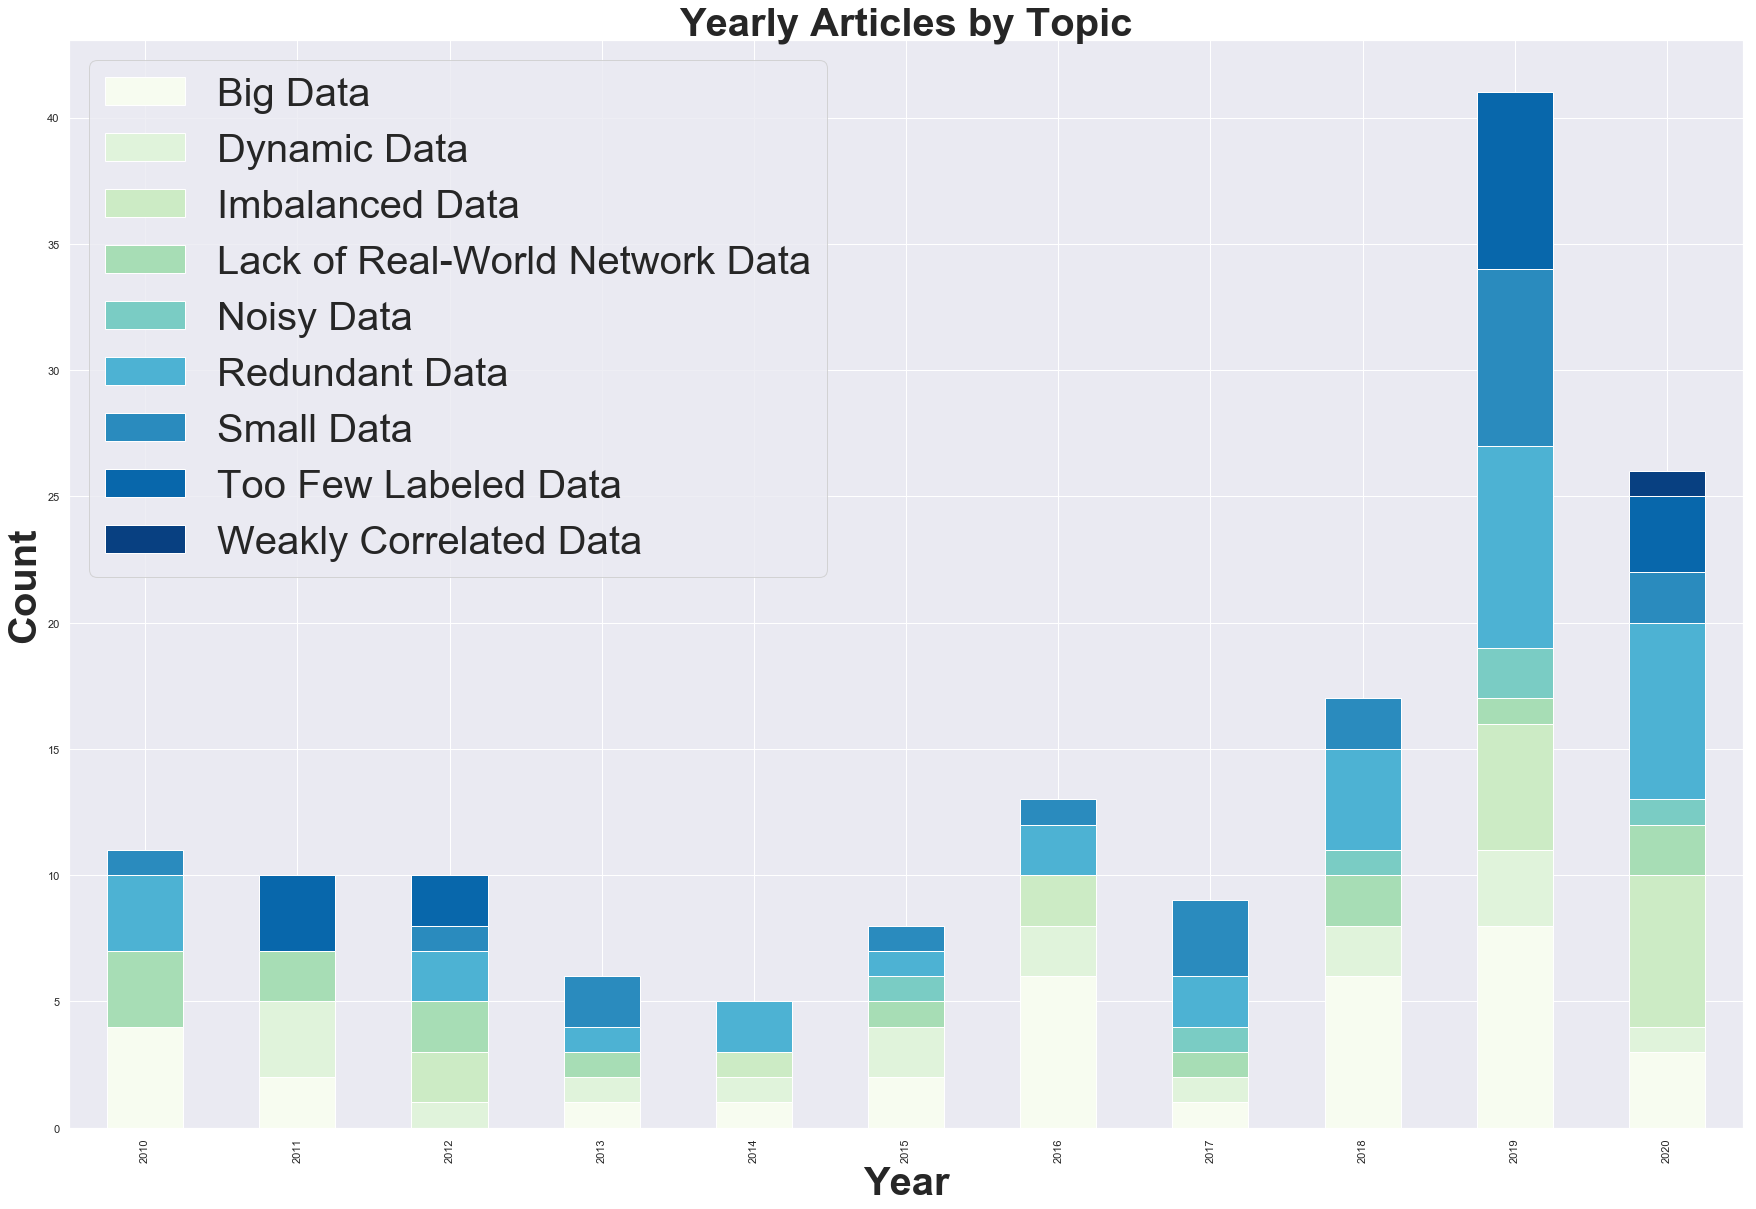

In [47]:
fig, ax = plt.subplots(figsize=(30,20))
stacked_bar_seaborn = article_data_df.plot(ax=ax,kind="bar",stacked=True,colormap="GnBu")
stacked_bar_seaborn.set_xticklabels(stacked_bar_seaborn.get_xticklabels(), rotation=90)
plt.rc("xtick",labelsize=40)
plt.rc("ytick",labelsize=40)
plt.legend(fontsize=40)
stacked_bar_seaborn.set_title("Yearly Articles by Topic",weight='bold').set_fontsize(40)
stacked_bar_seaborn.set_ylabel("Count",weight="bold").set_fontsize(40)
stacked_bar_seaborn.set_xlabel("Year",weight="bold").set_fontsize(40)
stacked_bar_seaborn.figure.savefig("yearly_topic.png")

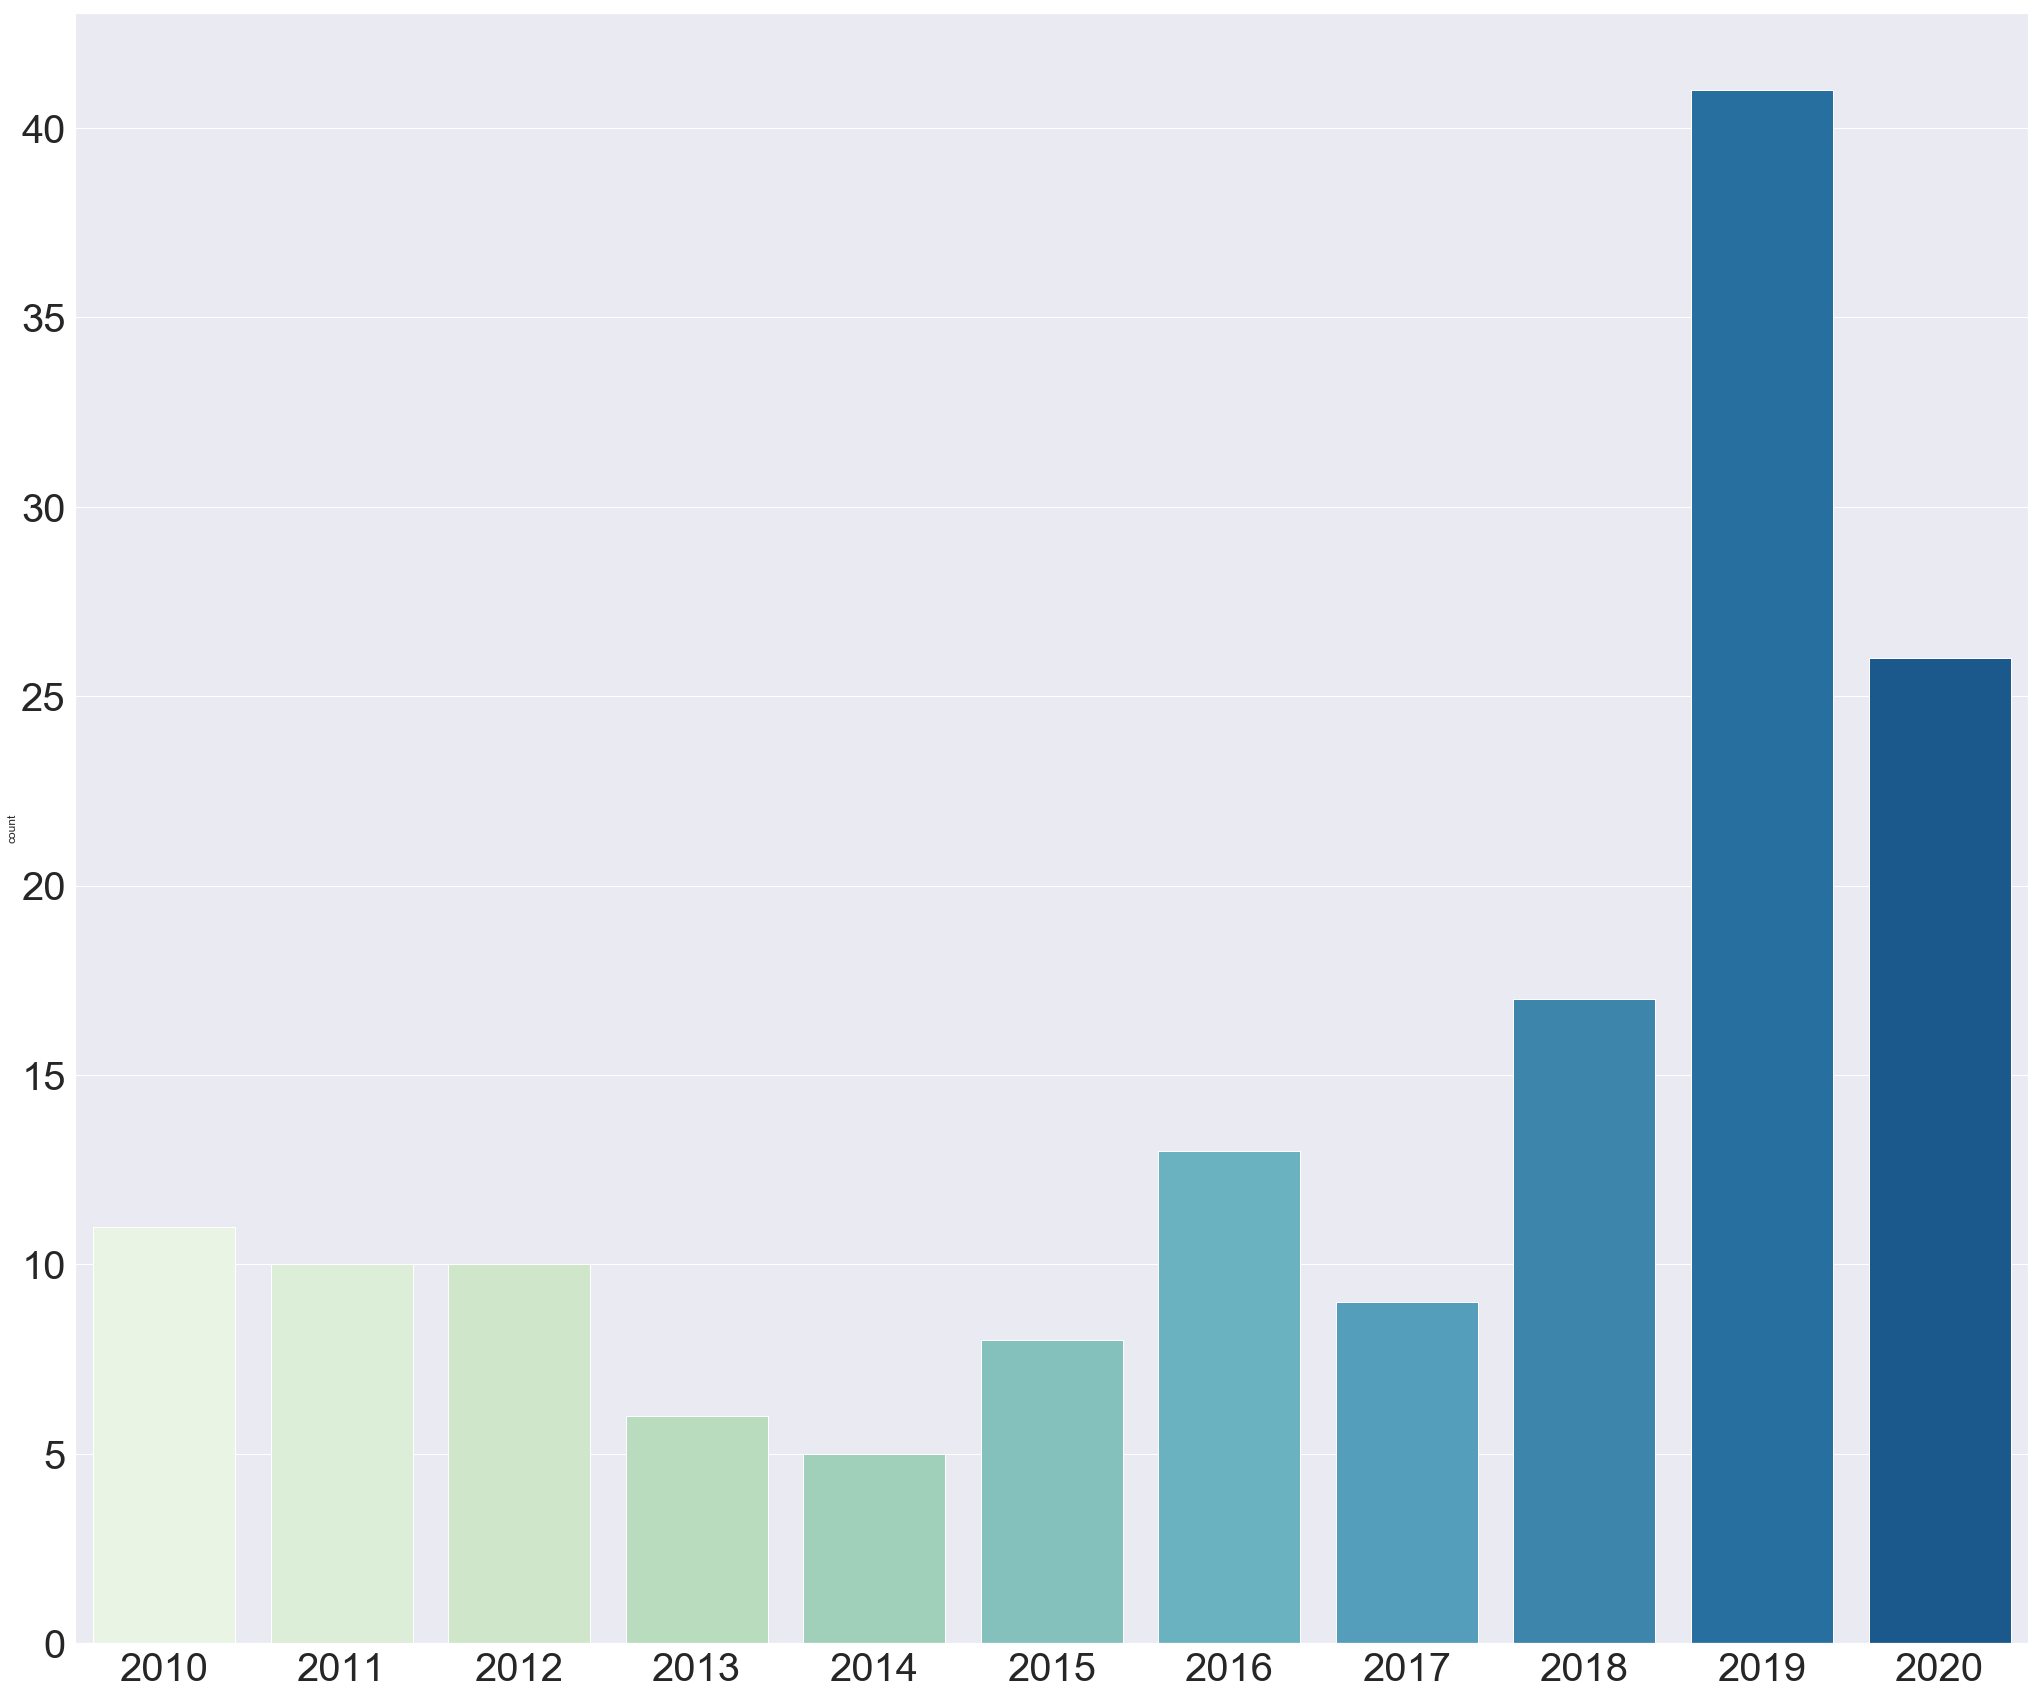

In [48]:
sns.countplot(sorted(list(articles.data["creation_date"].apply(lambda x:  str(x)[:4]))),palette="GnBu") # by year


## Here we revisit the clustering of these articles with topic modeling

Although we have organized the articles into specific categories on their own, we can inspect to see if topic modeling unveils different categories with latent dirichlet allocation (LDA) for Dynamic Data articles.

In [263]:
# corpus
articlesLDA = c[c['topic'] == 'Dynamic Data']['text']

In [264]:
# hyperparameters
topics = 2
alpha = topics
eta = 1/topics
iterations = 200
# iterations for gibbs sampling - MCMC that can obtain a sequence of observations - approximated from multivariate
# probability distribution

In [265]:
# In pre-processing, we can lemmatize and get common stems of words
import nltk
from nltk.corpus import stopwords

In [266]:
stopWordsSet = set(stopwords.words('english'))
knownWords = {'network','data','attack','anomaly','learning',
              'attack','model','algorithm','set','training',
              'detection','false','true','number','intrusion','classification',
             'accuracy','normal','feature','machine','al','traffic','use','used',
              'packet','table','method','based','security','system','regular',
              'one','use','role','also','features','bold','bolditalic','features',
              'ieee','proposed','time'}
def cleanText(text):
    outText = text.lower()
    outText = re.sub(r'[^a-z]',' ', outText)
    textTokens = nltk.word_tokenize(outText)
    textTokens = [word for word in textTokens if (word not in stopWordsSet and len(word) > 1 and word not in knownWords)]
    return textTokens

In [267]:
processedCorpus = articlesLDA.apply(lambda row: cleanText(row))

In [268]:
# To do away with the words in the corpus, we assign each word a tag.
tagCounter = [0]
wordDict = dict()
def updateDictAndTags(document):
    newDocument = []
    for word in document:
        if wordDict.get(word) is None:
            wordDict[word] = tagCounter[0]
            newDocument += [tagCounter[0]]
            tagCounter[0] += 1
        else:
            newDocument += [wordDict[word]]
    return newDocument

taggedWordCorpus = processedCorpus.apply(lambda row: updateDictAndTags(row))

In [269]:
processedCorpus = list(processedCorpus)
taggedWordCorpus = list(taggedWordCorpus)

In [270]:
import random
# We can randomly assign topics to each, but initialization optimizations may be analyzed as well.
wordTopicCountMatrix = []
for i in range(topics):
    wordTopicCountMatrix.append([0]*(tagCounter[0]))
topicAssignmentsMatrix = []
for i in range(len(processedCorpus)):
    topicAssignmentsMatrix.append([])
for i in range(len(taggedWordCorpus)):
    for token in taggedWordCorpus[i]:
        topicAssignmentsMatrix[i].append(random.sample(range(topics),1)[0])
        wordTopicCountMatrix[topicAssignmentsMatrix[i][-1]][token] += 1
        

In [271]:
documentTopicMatrix = []
for article in range(len(processedCorpus)):
    documentTopicMatrix.append([0]*topics)
for article in range(len(taggedWordCorpus)):
    for topic in range(topics):
        documentTopicMatrix[article][topic] = topicAssignmentsMatrix[article].count(topic)


In [272]:
from tqdm import tqdm

## General Algorithmic Approach

**LDA - Generative Approach**

Topic distribution of each word is $\theta \sim Dirichlet(\alpha)$. Word distribution is $\phi \sim Dirichlet(\eta)$

The total probability of the latent dirichlet allocation model is a joint distribution:
$P(\mathbf{W},\theta,\phi,\mathbf{Z};\alpha,\eta) = \prod\limits_{i=1}^{topics} P(\phi_i;\eta)
\prod\limits_{j=1}^{documents}P(\theta_j;\alpha)\prod\limits_{t=1}^{numWords}P(\mathbf{Z}_{j,t}|\theta_j)
P(\mathbf{W}_{j,t}|\phi_{Z_{j,t}})$. The first two products are prior probabilities as mentioned above of topic and word distributions.

In [280]:

def LDA(iterations):
    for epoch in tqdm(range(iterations)):
        for article in range(len(taggedWordCorpus)):
            for tokenIndex in range(len(taggedWordCorpus[article])):
                topicAssigned = topicAssignmentsMatrix[article][tokenIndex]
                wordIndex = taggedWordCorpus[article][tokenIndex]
                # in both count matrices, we exclude the token of the current index during sampling
                wordTopicCountMatrix[topicAssigned][wordIndex] -= 1
                documentTopicMatrix[article][topicAssigned] -= 1
                # sample new topic from multinomial distribution
                probDocTopic = (np.array(documentTopicMatrix)[article,:] + alpha)/(np.sum(np.array(documentTopicMatrix)[article,:]) + topics * alpha)
                probTopicWord = (np.array(wordTopicCountMatrix)[:,wordIndex] + eta)/(np.array(wordTopicCountMatrix).sum(axis=1) + (tagCounter[0] * eta) )
                totalProb = probDocTopic*probTopicWord
                calculatedTopic = np.random.choice(range(topics), 1, p=totalProb/np.sum(totalProb))[0]

                topicAssignmentsMatrix[article][tokenIndex] = calculatedTopic
                documentTopicMatrix[article][calculatedTopic] += 1 
                wordTopicCountMatrix[calculatedTopic][wordIndex] += 1
        
    #             if (topicAssigned != calculatedTopic):
    #                 print('Document Number:', 
    #                       article, 
    #                       'Token:',
    #                       tokenIndex,
    #                       'Topic:', topicAssigned,'=>',calculatedTopic)

In [281]:
# LDA(iterations)
# This confirms understanding of LDA as a probabilistic generatic process, but multicore LDA is abstracted in 
# gensim, so we can employ that.

## Using gensim LDA

In [282]:
import gensim.corpora as corpora
import gensim
termFreq = corpora.Dictionary(processedCorpus)
termDocFrequency = [termFreq.doc2bow(text) for text in processedCorpus]

In [285]:
topics = 3
networkArticleLDA = gensim.models.LdaMulticore(corpus=termDocFrequency,
                                       id2word=termFreq,
                                       num_topics=topics)

In [286]:
networkArticleLDA.print_topics()

[(0,
  '0.006*"new" + 0.006*"using" + 0.005*"cluster" + 0.004*"dataset" + 0.004*"rate" + 0.004*"value" + 0.004*"class" + 0.004*"instances" + 0.004*"outlier" + 0.004*"et"'),
 (1,
  '0.006*"using" + 0.005*"dataset" + 0.005*"incremental" + 0.005*"new" + 0.005*"instances" + 0.005*"classifier" + 0.005*"concept" + 0.005*"cluster" + 0.004*"value" + 0.004*"hmm"'),
 (2,
  '0.007*"using" + 0.007*"concept" + 0.007*"new" + 0.006*"incremental" + 0.006*"value" + 0.006*"micro" + 0.005*"decision" + 0.005*"drift" + 0.004*"random" + 0.004*"cluster"')]

### Here we see main approaches according to LDA on dynamic network flow data articles are "incremental" learning (online), "concept drift" and clustering, and using different "phases" - online and offline approach.

### Although it's not shown, running with the category "Big Data" would result in the topics of proper "selection", tuning learning "rate", and different "sampling" techniques, possibly with SVM.

In [287]:
topics = 5
networkArticleLDA2 = gensim.models.LdaMulticore(corpus=termDocFrequency,
                                       id2word=termFreq,
                                       num_topics=topics)

In [288]:
networkArticleLDA2.print_topics()

[(0,
  '0.008*"hmm" + 0.006*"concept" + 0.006*"using" + 0.006*"incremental" + 0.005*"classifier" + 0.005*"dataset" + 0.005*"new" + 0.004*"random" + 0.004*"vector" + 0.004*"online"'),
 (1,
  '0.007*"new" + 0.006*"using" + 0.006*"value" + 0.005*"incremental" + 0.004*"approach" + 0.004*"antibody" + 0.004*"dataset" + 0.004*"et" + 0.004*"cluster" + 0.004*"classifier"'),
 (2,
  '0.007*"new" + 0.006*"using" + 0.006*"class" + 0.006*"cluster" + 0.005*"clusters" + 0.005*"et" + 0.004*"value" + 0.004*"incremental" + 0.004*"instances" + 0.004*"micro"'),
 (3,
  '0.009*"using" + 0.007*"micro" + 0.006*"value" + 0.006*"drift" + 0.006*"new" + 0.005*"cluster" + 0.005*"incremental" + 0.005*"concept" + 0.005*"instances" + 0.004*"clusters"'),
 (4,
  '0.007*"decision" + 0.006*"concept" + 0.006*"new" + 0.006*"using" + 0.005*"incremental" + 0.005*"phase" + 0.005*"random" + 0.004*"instances" + 0.004*"cluster" + 0.004*"value"')]

## Using sklearn LDA and Grid Search

In [298]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

In [334]:
vocabNetworkArticles = []
for i in range(len(processedCorpus)):
    for word in processedCorpus[i]:
        vocabNetworkArticles.append(word)
vocabNetworkArticles = set(vocabNetworkArticles)

In [365]:
vectorizer = CountVectorizer(analyzer='word',
                             stop_words='english',
                             min_df=1,
                             lowercase=True,
                             token_pattern='[a-zA-Z0-9]{4,}',
                            )
vecArticleData = vectorizer.fit_transform(vocabNetworkArticles)

In [366]:
vecArticleData.shape

(4941, 4311)

In [367]:
gridSearchParams = {'n_components':[5,6,7],'learning_decay':[0.5,1,1.5]}
LDANetworkArticles = LatentDirichletAllocation()

model = GridSearchCV(LDANetworkArticles, param_grid=gridSearchParams)

model.fit(vecArticleData)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [5, 6, 7], 'learning_decay': [0.5, 1, 1.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [368]:
bestLDAArticles = model.best_estimator_

print("Best Parameters:", model.best_params_)


Best Parameters: {'learning_decay': 0.5, 'n_components': 5}


In [369]:
displayedWords = pd.DataFrame(bestLDAArticles.components_)
displayedWords.columns = vectorizer.get_feature_names()
displayedWords

,abadeh,abbest,abdulsalam,aben,ability,able,abnew,abnormal,abraham,abright,...,zhao,zhaohui,zhong,zhou,zoubi,zuben,zuev,zulkernine,zunguo,zwadobef
0,0.200045,0.200045,0.200045,0.200045,0.200045,1.199815,0.200045,0.200044,0.200044,0.200045,...,0.200045,1.199815,0.200045,0.200045,0.200045,1.199815,0.200045,0.200045,0.200044,0.200044
1,0.200046,1.199818,0.200045,1.199818,0.200046,0.200046,0.200045,0.200045,0.200045,1.199818,...,0.200046,0.200046,0.200046,0.200045,0.200045,0.200046,1.199818,0.200045,0.200045,0.200045
2,0.200046,0.200046,0.200046,0.200046,0.200046,0.200047,0.200046,1.199820,1.199820,0.200046,...,0.200046,0.200047,0.200046,0.200046,0.200046,0.200047,0.200046,0.200046,1.199820,1.199820
3,1.199817,0.200045,0.200045,0.200045,1.199817,0.200046,0.200045,0.200045,0.200045,0.200045,...,1.199817,0.200046,1.199817,0.200045,0.200045,0.200046,0.200045,0.200045,0.200045,0.200045
4,0.200046,0.200046,1.199819,0.200046,0.200046,0.200046,1.199819,0.200045,0.200045,0.200046,...,0.200046,0.200046,0.200046,1.199819,1.199819,0.200046,0.200046,1.199819,0.200045,0.200045
